In [17]:
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import cartopy.crs as ccrs
import geopandas as gpd
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from utils.scatter_plot import scatter_plot


In [2]:
path_hma_gtng = 'data/extents/HMA/gtng_202307_hma_subregions.gpkg'
path_hma_lakes = 'data/lakes/HydroLakes_v10_hma.gpkg'


In [9]:
### read in data
hma_gtng = gpd.read_file(path_hma_gtng)
hma_lakes = gpd.read_file(path_hma_lakes)
hma_lakes.head(2)


,Hylak_id,Lake_name,Country,Continent,Poly_src,Lake_type,Grand_id,Lake_area,Shore_len,Shore_dev,...,Vol_src,Depth_avg,Dis_avg,Res_time,Elevation,Slope_100,Wshd_area,Pour_long,Pour_lat,geometry
0,136,Issyk Kul,Kyrgyzstan,Asia,SWBD,1,0,6195.93,608.84,2.18,...,1,280.5,72.678,276778.9,1601,-1.0,21917.0,77.427083,42.485417,"MULTIPOLYGON (((78.21662 42.74460, 78.21667 42..."
1,143,Qinghai,China,Asia,SWBD,1,0,4266.55,434.23,1.88,...,1,16.8,28.133,29456.6,3194,-1.0,29604.7,100.197917,36.922917,"MULTIPOLYGON (((99.97966 37.23266, 99.98155 37..."


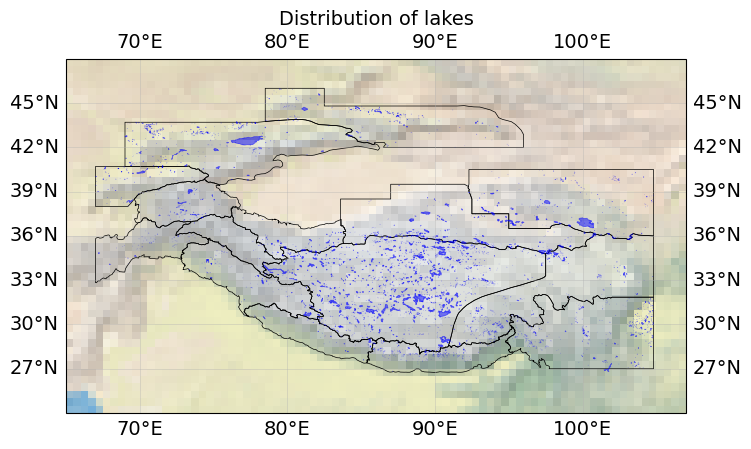

In [ ]:
## Lakes
plt.rcParams.update({'font.size':14})
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
hma_gtng.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5)
hma_lakes.plot(ax=ax, edgecolor='blue', facecolor='blue', linewidth=0.5, alpha=0.5)
ax.stock_img()
ax.set_title('Distribution of lakes', fontsize=14)
# plt.savefig('figures/hma_lakes.png', bbox_inches='tight', dpi=100)


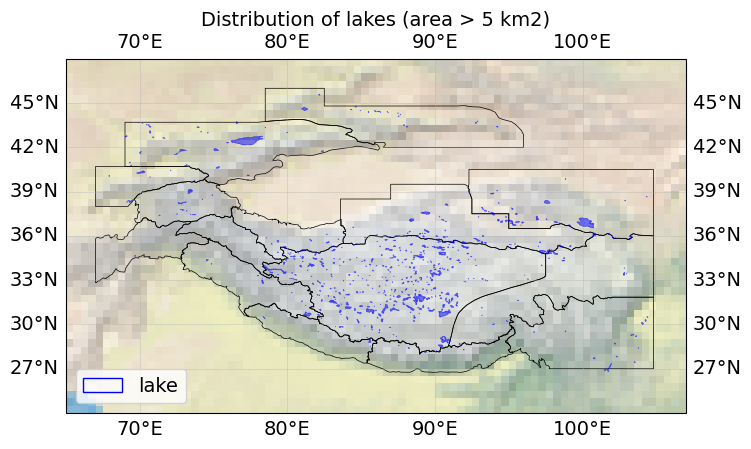

In [ ]:
## Lakes
hma_lakes_larger2 = hma_lakes[hma_lakes['Lake_area'] > 5]
plt.rcParams.update({'font.size':14})
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
hma_gtng.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5)
hma_lakes_larger2.plot(ax=ax, edgecolor='blue', facecolor='blue', linewidth=0.5, alpha=0.5)
ax.stock_img()
legend_patches = [
  mpatches.Patch(edgecolor='blue', facecolor='none', label='lake')]
ax.legend(handles=legend_patches, loc='lower left')
ax.set_title('Distribution of lakes (area > 5 km2)', fontsize=14)
# plt.savefig('figures/hma_lakes.png', bbox_inches='tight', dpi=100)



#### Statistic of the lakes area and lakes number of each region.

In [15]:
### statistic of the lakes area in each basin.
hma_gtng['area_lakes'] = np.nan
hma_gtng['num_lakes'] = np.nan
for i in range(hma_gtng.shape[0]):
    basin = hma_gtng['geometry'][i]
    ids = np.where(basin.contains(hma_lakes['geometry'].centroid))[0]
    area_basin = hma_lakes.loc[ids, 'Lake_area'].sum()   # Sum the area of lakes
    hma_gtng.loc[i, 'area_lakes'] = area_basin    # Area of lakes
    hma_gtng.loc[i, 'num_lakes'] = len(ids)       # Number of lakes


Text(0.5, 1.0, 'Lakes in hma regions')

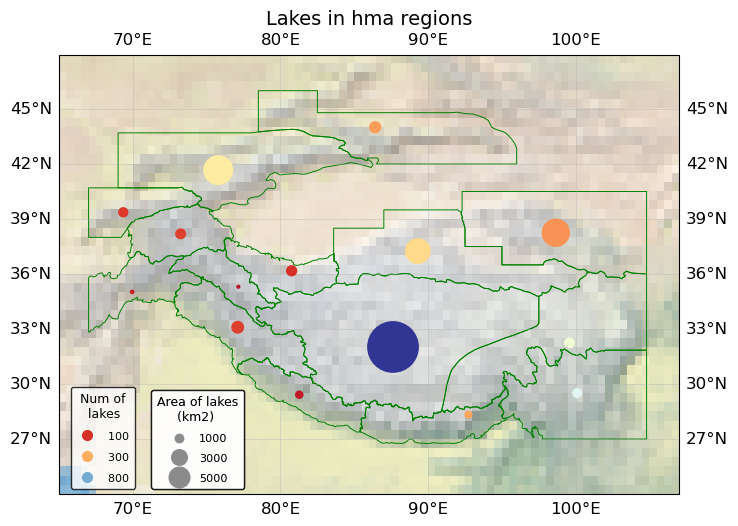

In [ ]:
region_centers = hma_gtng.geometry.representative_point()
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
ax.stock_img()
hma_gtng.plot(ax = ax, facecolor='None', edgecolor='green', lw=0.7)
plt.rcParams.update({'font.size': 9})
scatter_plot(region_centers.x.values, region_centers.y.values, 
                          size=hma_gtng['area_lakes'].values,  
                          color=hma_gtng['num_lakes'].values, ax=ax, 
                          title_legend_color='Num of\n  lakes', 
                          title_legend_size='Area of lakes\n     (km2)',                          
                          labels_size = [1000, 3000, 5000], labels_color = [100, 300, 800], 
                          scale_size = 1/20, color_range=[0, 1000], cmap="RdYlBu")
ax.set_title('Lakes in hma regions', fontsize=14)
